The objective of this experiment is to understand word2vec.

In this experiment we will use **Mahabharata** as our text corpus

##### Importing the required packages

In [1]:
import gensim
# Operating System
import os
# Regular Expression
import re
# nltk packages
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
# Basic Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# PCA Package
from sklearn.decomposition import PCA

Snowball is a small string processing language designed for creating stemming algorithms for use in Information Retrieval. 

##### Creating a new instance of a language specific subclass.

In [2]:
stemmer = SnowballStemmer("english")

##### In below cell we are trying to pre-process the text data and not stemming the stop words

In [3]:
stopWords = pd.read_csv('stopwords.txt').values

class MySentences(object):
    def __init__(self, fnamelist):
        self.fnamelist = fnamelist
        # Creating a set of vocabulary
        self.vocabulary = set([])

    def __iter__(self):
        for fname in self.fnamelist:
            for line in open(fname, encoding='latin1'):
                # Find all the words that has letters from 2 - 15. If the words are longer than that ignore.
                words = re.findall(r'(\b[A-Za-z][a-z]{2,15}\b)', line)
                # Stemming a word.
                words = [ stemmer.stem(word.lower()) for word in words if not word.lower() in stopWords]
                for word in words:
                    self.vocabulary.add(word)
                yield words

##### In below cell we will read the data using an iterator in the class MySentences(). 

Gensim model: https://radimrehurek.com/gensim/models/word2vec.html

In [5]:
sentences = MySentences(['MB.txt']) # a memory-friendly iterator
# model = gensim.models.Word2Vec(sentences, min_count=100)
model_load = gensim.models.Word2Vec.load('MB2Vec.bin')

In [7]:
# model_load = model

##### Lets see the most similar words related to different characters

In [8]:
model_load.wv.most_similar('krishna')[:3]

[('kesava', 0.8457130789756775),
 ('vasudeva', 0.8021591901779175),
 ('govinda', 0.7766404151916504)]

In [9]:
model_load.wv.most_similar('arjuna')[:3]

[('partha', 0.9020223021507263),
 ('dhananjaya', 0.8211590051651001),
 ('vibhatsu', 0.8084746599197388)]

In [10]:
model_load.wv.most_similar('virata')[:3]

[('drupada', 0.8678191900253296),
 ('chedi', 0.8376131057739258),
 ('kasi', 0.8284690380096436)]

##### We will save the trained vectors .

In [11]:
#model = model.save("MB2Vec.bin")

##### Iterating through the vocabulary and constructing the word and vector list

In [21]:
words_list = np.array([])
vector_list = np.array([])
for i in model_load.wv.vocab:
    # print(i)
    try :
        words_list = np.append(words_list, i)
        vector_list = np.append(vector_list, model_load.wv[i])
    except :
        pass
vector_list = vector_list.reshape(len(model_load.wv.vocab), -1)

In [14]:
vector_list

array([[ 5.91569185e-01, -3.60498458e-01, -8.69407177e-01, ...,
         1.63720942e+00,  6.62568867e-01, -2.57091194e-01],
       [ 8.46108347e-02,  7.13719949e-02, -1.97172448e-01, ...,
         6.35522425e-01,  3.18951041e-01, -1.30285144e-01],
       [ 7.10277319e-01, -5.17078102e-01, -7.23681211e-01, ...,
         1.74011123e+00,  6.44196212e-01, -5.45892417e-01],
       ...,
       [-6.99568316e-02, -4.01841879e-01,  3.91527712e-01, ...,
         1.00422479e-01, -2.12643310e-01, -7.02344030e-02],
       [ 1.34031460e-01, -1.01951718e-01,  1.54690519e-01, ...,
        -1.30352026e-04,  1.24915764e-01, -2.71246642e-01],
       [-9.66004506e-02, -2.63817251e-01,  1.88694939e-01, ...,
         3.53449911e-01, -9.12723318e-02, -6.48950189e-02]])

##### Applying PCA on the vector_list to reduce the dimensions

In [15]:
pca = PCA(n_components=2)
pca.fit(vector_list)
compressed_list =pca.transform(vector_list)

##### Checking the shape of the vector_list

In [16]:
vector_list.shape

(1701, 100)

##### Checking the shape of the compressed_list after applying PCA

In [17]:
compressed_list.shape

(1701, 2)

##### Let us find the location of some characters in word_list to get the locations

In [18]:
characters = ['dussasana','sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']
locs = [np.where(words_list == x)[0][0] for x in characters]
print(locs)

[1627, 1626, 1522, 19, 1245, 1500, 1232, 245, 1659, 1572, 1381, 1646, 1531, 1603]


##### Let us Plot the data

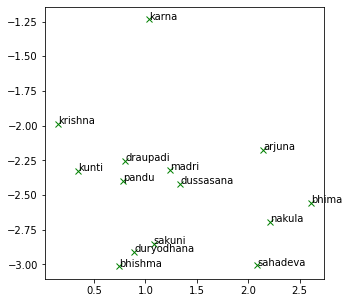

In [19]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
for character, pos in zip(characters, locs):
    m = model_load.wv.get_vector(character)
    value = pca.transform([m])[0]
    ax.plot(value[0], value[1], "gx")
    ax.annotate(words_list[pos], xy=value, xytext=value)
plt.show()
fig.savefig('word2vec.png')

###### Characters are grouped together based on word2vec learnt by the model.

##### We will see the most similar characters related to characters list as shown below.

##### characters = ['dussasana','sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']

In [20]:
# Persons closer to the characters of our choice based on the word2vec model
for character in characters:
    near = model_load.wv.most_similar(character)[:5]
    nearNames = [x[0] for x in near]
    print(character, ':'.join(nearNames), sep="\t")

dussasana	sakuni:duhsasana:vikarna:chitrasena:valhika
sakuni	dussasana:duhsasana:vikarna:suvala:valhika
duryodhana	dussasana:suyodhana:sakuni:jayadratha:dhritarashtra
bhishma	salya:vaisampayana:sanjaya:savyasachin:kama
krishna	kesava:vasudeva:govinda:madhava:vibhatsu
madri	somadatta:subhadra:prishata:suvala:valiant
pandu	pritha:kunti:radha:suta:subhadra
kunti	pritha:radha:pandu:suta:santanu
karna	duhsasana:yuyudhana:abhimanyu:bhagadatta:jayadratha
bhima	bhimasena:vrikodara:abhimanyu:satyaki:lakshmana
arjuna	partha:dhananjaya:vibhatsu:kama:bhima
nakula	sahadeva:vikarna:aswatthaman:duhsasana:satyaki
sahadeva	nakula:satyaki:duhsasana:vikarna:dhrishtadyumna
draupadi	drupada:sakuni:dussasana:madri:suvala


In [ ]:
#TASK Modify the gensim word2vec model to train skip gram model.